In [1]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
import Nucleaseq_data_processing as processing
reload(processing)
import read_model_ID as model
reload(model)

guide = 20

# HF1

## Load Data

In [27]:
filename = 'HF1_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data,True,False,True,True)

kclv = []
kon = []

i = 1
while i < guide+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0][0])
            kon.append(ydata[a][1][0])

            i = i + 1
    
kclv.append(ydata[0][0][0])
kclv = np.array(kclv)
kon.append(ydata[0][1][0])
kon = np.array(kon)

k_double = np.zeros([20,20])
on_double = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = ydata[a][0][0]
        on_double[j-1,i-1] = ydata[a][1][0]
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
on_double_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))

## Parameters

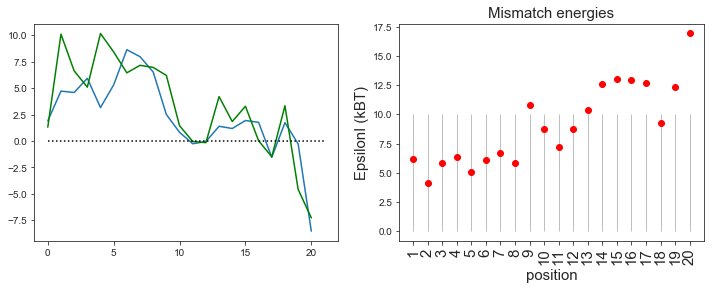

In [144]:
model_id = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '44'


filename = 'fit_13_6_2019_sim_2.txt'
path = '../fits_Stijn/13_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

parameters[21] += 0. #1
parameters[22] += 0. #2
parameters[23] += 0. #3
parameters[24] += 0. #4
parameters[25] += 0. #5
parameters[26] += 0. #6
parameters[27] += 0. #7
parameters[28] += 0. #8

parameters[29] += 2. #9
parameters[30] += 1.5 #10
parameters[31] += 0. #11
parameters[32] += 2.5 #12
parameters[33] += 3. #13
parameters[34] += 5.5 #14
parameters[35] += 6.5 #15
parameters[36] += 7. #16
parameters[37] += 8.5 #17
parameters[38] += 7. #18
parameters[39] += 7.5 #19
parameters[40] += 10. #20




model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies1,rates1 = model.unpack_parameters(parameters_on,model_ID_on,20)

best_fit_boyle = np.loadtxt('best_fit_new.txt')
best_fit_boyle = -np.cumsum(best_fit_boyle[0:21])

f,ax = plt.subplots(1,2,sharey=False,figsize=[12,4])
ax[0].plot(range(0,21), -np.cumsum(np.append(-energies1[0],energies1[1:21])))
ax[0].plot(range(0,21),best_fit_boyle,'g')
ax[0].plot([0,21],[0,0],'k:')

ax[1].plot(range(1,21),parameters[21:41],'ro')
ax[1].set_xlabel('position',fontsize=15)
ax[1].set_ylabel('EpsilonI (kBT)',fontsize=15)
ax[1].set_title('Mismatch energies',fontsize=15)
ax[1].vlines(range(1,21),0,10,color='grey',linewidth=0.5);
ax[1].set_xticklabels(range(1,21),fontsize=15,rotation='vertical');
ax[1].set_xticks(range(1,21));

## Predict

Text(453.236,0.5,'mismatch 2')

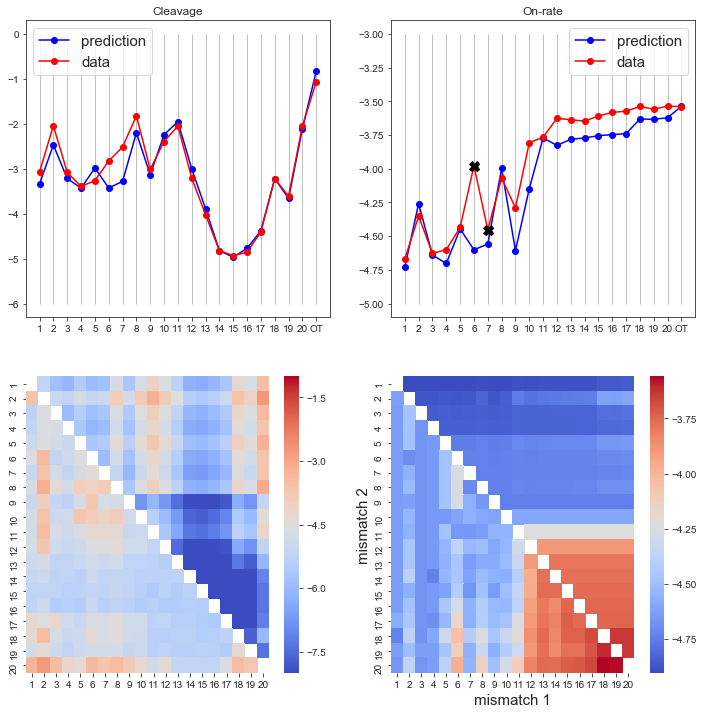

In [145]:
k = np.zeros(21)
on = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],on[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions,20))
k[-1],on[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[],20))

f,ax = plt.subplots(2,2,sharey=False,figsize=[12,12])
    
ax[0][0].plot(range(1,22),k,marker='o',color='blue')
ax[0][0].set_xticks(range(1,22));
ax[0][0].set_xticklabels(range(1,21)+['OT'])
ax[0][0].vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
ax[0][0].plot(range(1,22),kclv,marker='o',color='red')
ax[0][0].legend(['prediction','data'],fontsize=15)
ax[0][0].set_title('Cleavage')

ax[0][1].plot(range(1,22),on,marker='o',color='blue')
ax[0][1].set_xticks(range(1,22));
ax[0][1].set_xticklabels(range(1,21)+['OT'])
ax[0][1].vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
ax[0][1].plot(range(1,22),kon,marker='o',color='red')
ax[0][1].legend(['prediction','data'],fontsize=15)
ax[0][1].set_title('On-rate')
for i in range(21):
    if i+1==6 or i+1==7:
        ax[0][1].plot(i+1,kon[i],marker='X',color='k',markersize=10)

k_double = np.zeros([20,20])
on_double = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],on_double[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions,20))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_df = k_df + k_double_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
on_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))
on_df = on_df + on_double_df
for i in range(1,21):
    on_df[i].loc[i]=np.nan
    
sns.heatmap(k_df, cmap='coolwarm', cbar=True,ax=ax[1][0],vmin=-8, vmax = -1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

sns.heatmap(on_df, cmap='coolwarm', cbar=True,ax=ax[1][1])
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

## Comparing

[4.07791310e-03 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 0.00000000e+00]
[3.98107171e-03 9.95832250e+02 9.95832250e+02 9.95832250e+02
 9.95832250e+02 9.95832250e+02 9.95832250e+02 9.95832250e+02
 9.95832250e+02 9.95832250e+02 9.95832250e+02 9.95832250e+02
 9.95832250e+02 9.95832250e+02 9.95832250e+02 9.95832250e+02
 9.95832250e+02 9.95832250e+02 9.95832250e+02 9.95832250e+02
 9.95832250e+02 0.00000000e+00]
[3.98107171e-03 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 0.000

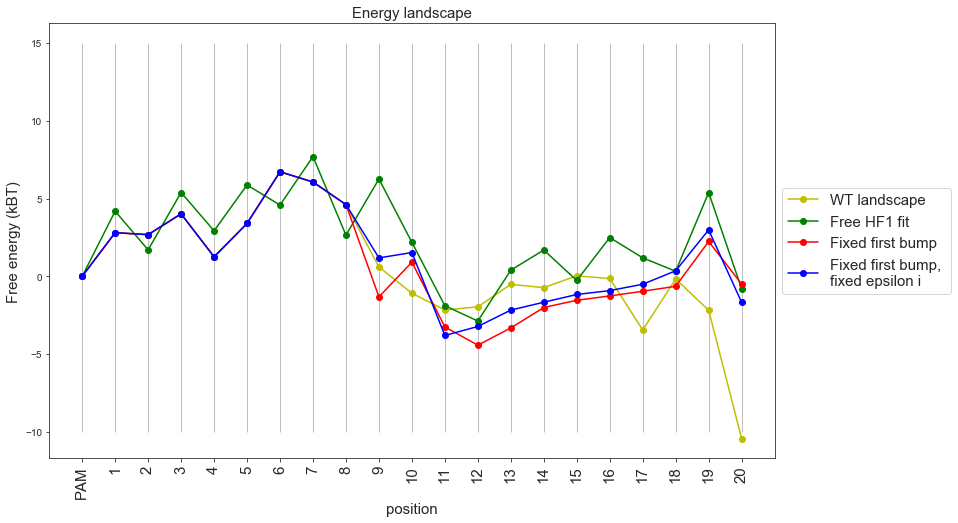

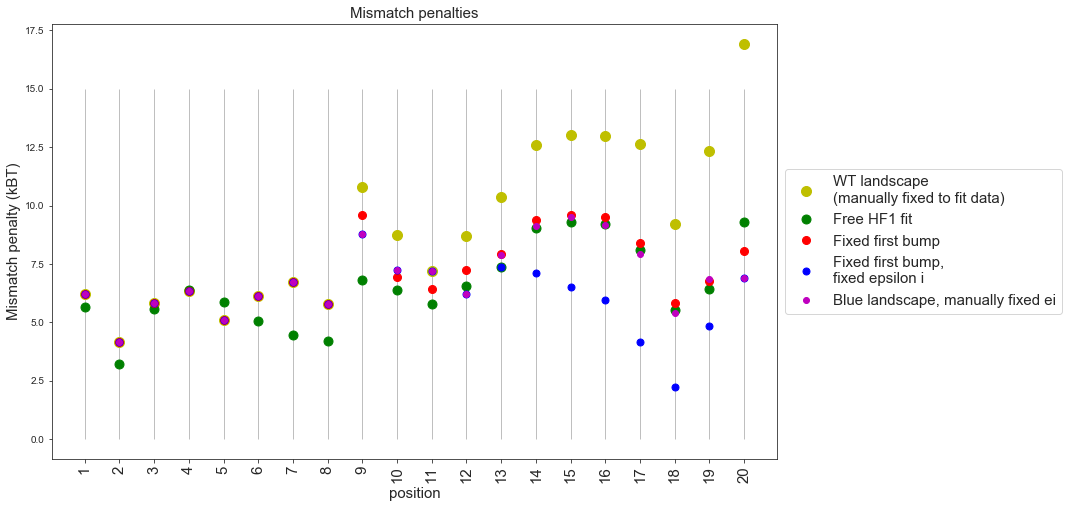

In [146]:
plt.figure(figsize=[13,8])
plot1, = plt.plot(range(0,21), -np.cumsum(np.append(0,energies1[1:21])),'y-o',label='WT landscape')

model_id = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '42'
filename = 'fit_17_6_2019b_sim_2.txt'
path = '../fits_Stijn/17_6_2019b/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)
parameters = np.append([1.4],np.append(parameters[0:40],np.append([-2.4],parameters[40:42])))

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies2,rates2 = model.unpack_parameters(parameters_on,model_ID_on,20)
plot2, = plt.plot(range(0,21), -np.cumsum(np.append(0,energies2[1:21])),'g-o',label='Free HF1 fit')


model_id = 'First_bump_fixed_for_engineered_cas+First_bump_fixed_for_engineered_cas_on'; parnum = '25'
filename = 'fit_18_6_2019_sim_2.txt'
path = '../fits_Stijn/18_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies3,rates3 = model.unpack_parameters(parameters_on,model_ID_on,20)
plot3, = plt.plot(range(0,21), -np.cumsum(np.append(0,energies3[1:21])),'r-o',label='Fixed first bump')




plt.xlabel('position',fontsize=15)
plt.ylabel('Free energy (kBT)',fontsize=15)
plt.title('Energy landscape',fontsize=15)
plt.vlines(range(0,21),-10,15,color='grey',linewidth=0.5);
plt.xticks(range(0,21),['PAM'] + range(1,21),fontsize=15,rotation='vertical');

model_id = 'First_bump_fixed_for_engineered_cas_fixed_ei+First_bump_fixed_for_engineered_cas_on_fixed_ei'; parnum = '13'
filename = 'fit_19_6_2019_sim_1.txt'
path = '../fits_Stijn/19_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies4,rates4 = model.unpack_parameters(parameters_on,model_ID_on,20)
plot4, = plt.plot(range(0,21), -np.cumsum(np.append(0,energies4[1:21])),'b-o',label='Fixed first bump, \nfixed epsilon i')

plt.legend(handles=[plot1,plot2,plot3,plot4],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)

plt.figure(figsize=[13,8])
plot5, = plt.plot(range(1,21),energies1[21:41],'yo',markersize=10,label='WT landscape \n(manually fixed to fit data)')
plot6, = plt.plot(range(1,21),energies2[21:41],'go',markersize=9,label='Free HF1 fit')
plot7, = plt.plot(range(1,21),energies3[21:41],'ro',markersize=8,label='Fixed first bump')
plot8, = plt.plot(range(1,21),energies4[21:41],'bo',markersize=7,label='Fixed first bump, \nfixed epsilon i')
plot9, = plt.plot(range(1,21),editepsilon,'mo',markersize=6,label='Blue landscape, manually fixed ei')
plt.legend(handles=[plot5,plot6,plot7,plot8,plot9],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('Mismatch penalty (kBT)',fontsize=15)
plt.title('Mismatch penalties',fontsize=15)
plt.vlines(range(1,21),0,15,color='grey',linewidth=0.5);
plt.xticks(range(1,21),range(1,21),fontsize=15,rotation='vertical');

print rates1
print rates2
print rates3

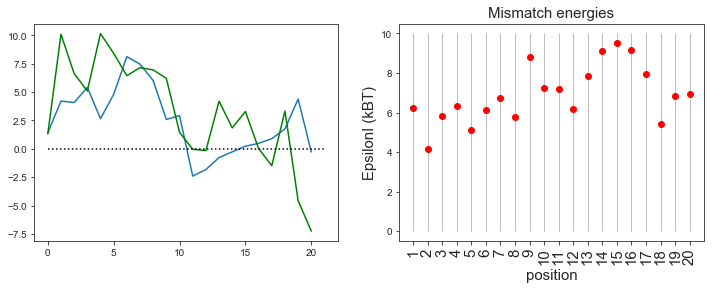

In [139]:
model_id = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '44'

parameters = np.zeros(44)

parameters[0] = 1.4
parameters[1:9] = [-2.81040538514, 0.128379438824, -1.3398902138600002, 2.7652185198900003,
 -2.14593791558, -3.32591676706, 0.660542944429, 1.44885468799]

filename = 'fit_19_6_2019_sim_1.txt'
path = '../fits_Stijn/19_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter 13']
parameters[9:21] = np.array(final_par.values)[0:12]
parameters[-1] = np.array(final_par.values)[-1]

parameters[21:41] = [6.21210100464, 4.15685735918, 5.83016614093, 6.3469277879299995, 5.0974118607,
 6.11732311667, 6.71550763398, 5.800000188080001, 8.798329158660001,
 7.23490655459, 7.205774376210001, 6.204434796699999, 7.374378511639999,
 7.108293219149999, 6.51786601314, 5.95938096651, 4.1476939067, 2.22435794942,
 4.85593404545, 6.91967070006]

parameters[41] = -2.4
parameters[42] = 2.5336611063

parameters[21] += 0. #1
parameters[22] += 0. #2
parameters[23] += 0. #3
parameters[24] += 0. #4
parameters[25] += 0. #5
parameters[26] += 0. #6
parameters[27] += 0. #7
parameters[28] += 0. #8
parameters[29] += 0. #9
parameters[30] += 0. #10
parameters[31] += 0. #11
parameters[32] += 0. #12

parameters[33] += .5 #13
parameters[34] += 2. #14
parameters[35] += 3. #15
parameters[36] += 3.2 #16
parameters[37] += 3.8 #17
parameters[38] += 3.2 #18
parameters[39] += 2. #19
parameters[40] += 0. #20

editepsilon = parameters[21:41]

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies,rates = model.unpack_parameters(parameters_on,model_ID_on,20)

best_fit_boyle = np.loadtxt('best_fit_new.txt')
best_fit_boyle = -np.cumsum(best_fit_boyle[0:21])

f,ax = plt.subplots(1,2,sharey=False,figsize=[12,4])
ax[0].plot(range(0,21), -np.cumsum(np.append(-energies[0],energies[1:21])))
ax[0].plot(range(0,21),best_fit_boyle,'g')
ax[0].plot([0,21],[0,0],'k:')

ax[1].plot(range(1,21),energies[21:41],'ro')
ax[1].set_xlabel('position',fontsize=15)
ax[1].set_ylabel('EpsilonI (kBT)',fontsize=15)
ax[1].set_title('Mismatch energies',fontsize=15)
ax[1].vlines(range(1,21),0,10,color='grey',linewidth=0.5);
ax[1].set_xticklabels(range(1,21),fontsize=15,rotation='vertical');
ax[1].set_xticks(range(1,21));

Text(453.236,0.5,'mismatch 2')

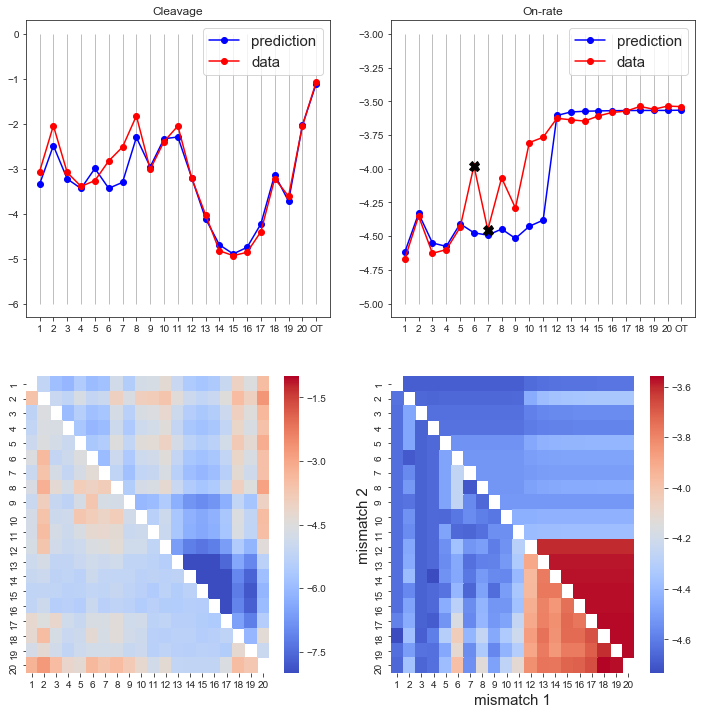

In [134]:
reload(model)
reload(clv)

k = np.zeros(21)
on = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],on[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions,20))
k[-1],on[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[],20))

f,ax = plt.subplots(2,2,sharey=False,figsize=[12,12])
    
ax[0][0].plot(range(1,22),k,marker='o',color='blue')
ax[0][0].set_xticks(range(1,22));
ax[0][0].set_xticklabels(range(1,21)+['OT'])
ax[0][0].vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
ax[0][0].plot(range(1,22),kclv,marker='o',color='red')
ax[0][0].legend(['prediction','data'],fontsize=15)
ax[0][0].set_title('Cleavage')

ax[0][1].plot(range(1,22),on,marker='o',color='blue')
ax[0][1].set_xticks(range(1,22));
ax[0][1].set_xticklabels(range(1,21)+['OT'])
ax[0][1].vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
ax[0][1].plot(range(1,22),kon,marker='o',color='red')
ax[0][1].legend(['prediction','data'],fontsize=15)
ax[0][1].set_title('On-rate')
for i in range(21):
    if i+1==6 or i+1==7:
        ax[0][1].plot(i+1,kon[i],marker='X',color='k',markersize=10)

k_double = np.zeros([20,20])
on_double = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],on_double[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions,20))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_df = k_df + k_double_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
on_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))
on_df = on_df + on_double_df
for i in range(1,21):
    on_df[i].loc[i]=np.nan
    
sns.heatmap(k_df, cmap='coolwarm', cbar=True,ax=ax[1][0],vmin=-8, vmax = -1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

sns.heatmap(on_df, cmap='coolwarm', cbar=True,ax=ax[1][1])
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

# eSpCas9

## Load Data

In [2]:
filename = 'Enh_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data,True,False,True,True)

kclv = []
kon = []

i = 1
while i < guide+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0][0])
            kon.append(ydata[a][1][0])

            i = i + 1
    
kclv.append(ydata[0][0][0])
kclv = np.array(kclv)
kon.append(ydata[0][1][0])
kon = np.array(kon)

k_double = np.zeros([20,20])
on_double = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = ydata[a][0][0]
        on_double[j-1,i-1] = ydata[a][1][0]
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
on_double_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))

Nucleaseq_data_processing.py:78: RuntimeWarning: invalid value encountered in log10
  yerr[i][1][j] = np.log10(1 + 2*errorpoint/(datapoint-2*errorpoint))
Nucleaseq_data_processing.py:42: RuntimeWarning: invalid value encountered in double_scalars
  yerr_sqr[i] = yerr[i]**2
C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Parameters WT

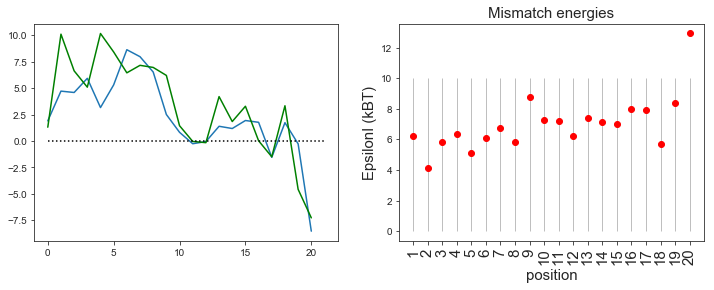

In [34]:
model_id = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '44'


filename = 'fit_13_6_2019_sim_2.txt'
path = '../fits_Stijn/13_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

parameters[21] += 0. #1
parameters[22] += 0. #2
parameters[23] += 0. #3
parameters[24] += 0. #4
parameters[25] += 0. #5
parameters[26] += 0. #6
parameters[27] += 0. #7
parameters[28] += 0. #8

parameters[29] += 0. #9
parameters[30] += 0. #10
parameters[31] += 0. #11
parameters[32] += 0. #12
parameters[33] += 0. #13
parameters[34] += 0. #14
parameters[35] += 0.5 #15
parameters[36] += 2. #16
parameters[37] += 3.8 #17
parameters[38] += 3.5 #18
parameters[39] += 3.5 #19
parameters[40] += 6. #20




model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies1,rates1 = model.unpack_parameters(parameters_on,model_ID_on,20)

best_fit_boyle = np.loadtxt('best_fit_new.txt')
best_fit_boyle = -np.cumsum(best_fit_boyle[0:21])

f,ax = plt.subplots(1,2,sharey=False,figsize=[12,4])
ax[0].plot(range(0,21), -np.cumsum(np.append(-energies1[0],energies1[1:21])))
ax[0].plot(range(0,21),best_fit_boyle,'g')
ax[0].plot([0,21],[0,0],'k:')

ax[1].plot(range(1,21),parameters[21:41],'ro')
ax[1].set_xlabel('position',fontsize=15)
ax[1].set_ylabel('EpsilonI (kBT)',fontsize=15)
ax[1].set_title('Mismatch energies',fontsize=15)
ax[1].vlines(range(1,21),0,10,color='grey',linewidth=0.5);
ax[1].set_xticklabels(range(1,21),fontsize=15,rotation='vertical');
ax[1].set_xticks(range(1,21));

## Predict

Text(453.236,0.5,'mismatch 2')

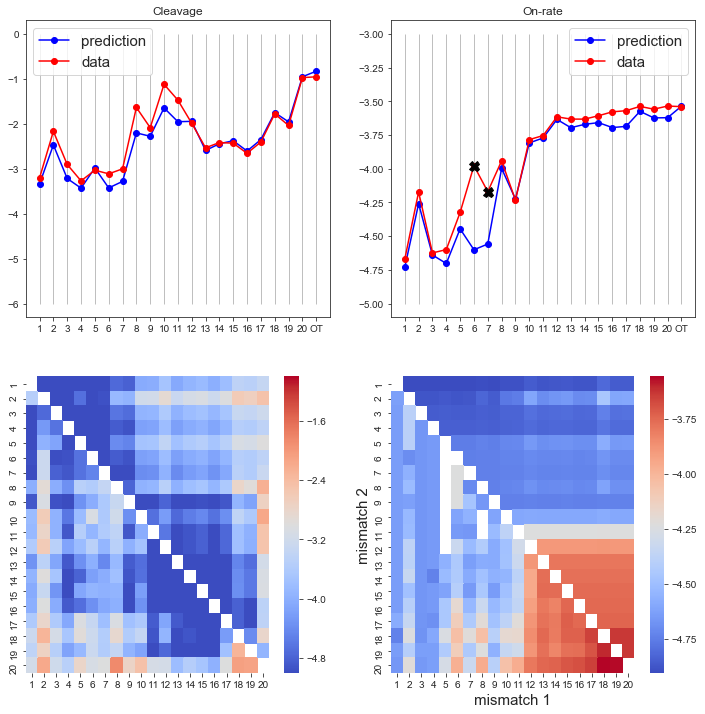

In [35]:
k = np.zeros(21)
on = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],on[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions,20))
k[-1],on[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[],20))

f,ax = plt.subplots(2,2,sharey=False,figsize=[12,12])
    
ax[0][0].plot(range(1,22),k,marker='o',color='blue')
ax[0][0].set_xticks(range(1,22));
ax[0][0].set_xticklabels(range(1,21)+['OT'])
ax[0][0].vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
ax[0][0].plot(range(1,22),kclv,marker='o',color='red')
ax[0][0].legend(['prediction','data'],fontsize=15)
ax[0][0].set_title('Cleavage')

ax[0][1].plot(range(1,22),on,marker='o',color='blue')
ax[0][1].set_xticks(range(1,22));
ax[0][1].set_xticklabels(range(1,21)+['OT'])
ax[0][1].vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
ax[0][1].plot(range(1,22),kon,marker='o',color='red')
ax[0][1].legend(['prediction','data'],fontsize=15)
ax[0][1].set_title('On-rate')
for i in range(21):
    if i+1==6 or i+1==7:
        ax[0][1].plot(i+1,kon[i],marker='X',color='k',markersize=10)

k_double = np.zeros([20,20])
on_double = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],on_double[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions,20))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_df = k_df + k_double_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
on_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))
on_df = on_df + on_double_df
for i in range(1,21):
    on_df[i].loc[i]=np.nan
    
sns.heatmap(k_df, cmap='coolwarm', cbar=True,ax=ax[1][0],vmin=-5, vmax = -1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

sns.heatmap(on_df, cmap='coolwarm', cbar=True,ax=ax[1][1])
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

## Comparing

[4.07791310e-03 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 0.00000000e+00]
[3.98107171e-03 9.96784044e+02 9.96784044e+02 9.96784044e+02
 9.96784044e+02 9.96784044e+02 9.96784044e+02 9.96784044e+02
 9.96784044e+02 9.96784044e+02 9.96784044e+02 9.96784044e+02
 9.96784044e+02 9.96784044e+02 9.96784044e+02 9.96784044e+02
 9.96784044e+02 9.96784044e+02 9.96784044e+02 9.96784044e+02
 9.96784044e+02 0.00000000e+00]
[3.98107171e-03 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 3.41712689e+02 3.41712689e+02 3.41712689e+02
 3.41712689e+02 0.000

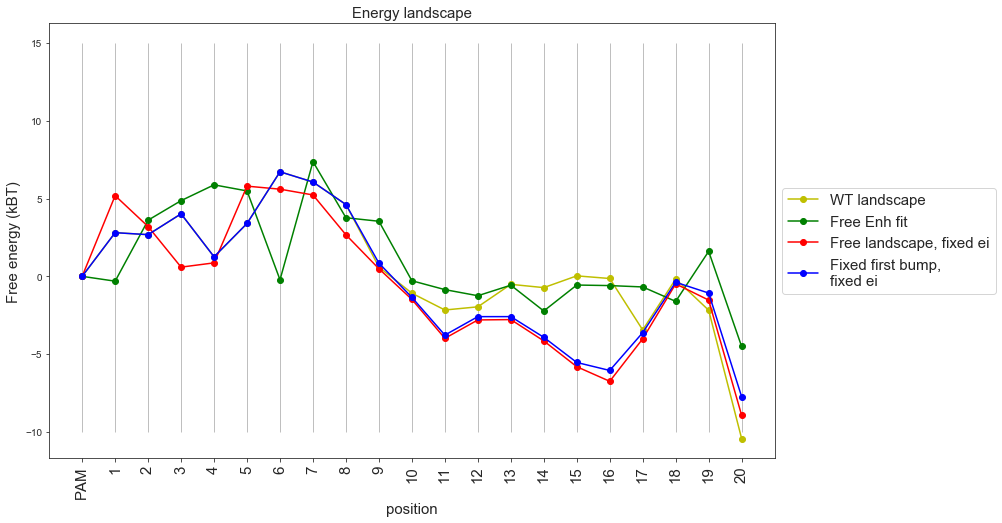

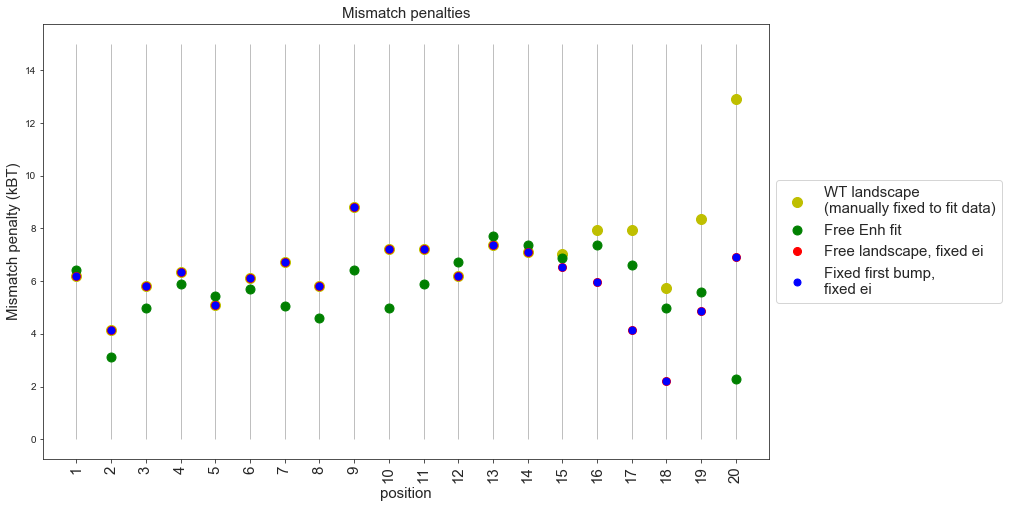

In [38]:
plt.figure(figsize=[13,8])
plot1, = plt.plot(range(0,21), -np.cumsum(np.append(0,energies1[1:21])),'y-o',label='WT landscape')

model_id = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '42'
filename = 'fit_21_6_2019_sim_2.txt'
path = '../fits_Stijn/21_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)
parameters = np.append([1.4],np.append(parameters[0:40],np.append([-2.4],parameters[40:42])))

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies2,rates2 = model.unpack_parameters(parameters_on,model_ID_on,20)
plot2, = plt.plot(range(0,21), -np.cumsum(np.append(0,energies2[1:21])),'g-o',label='Free Enh fit')


model_id = 'Engineered_cas_fixed_ei+Engineered_cas_on_fixed_ei'; parnum = '21'
filename = 'fit_24_6_2019_sim_2.txt'
path = '../fits_Stijn/24_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies3,rates3 = model.unpack_parameters(parameters_on,model_ID_on,20)
plot3, = plt.plot(range(0,21), -np.cumsum(np.append(0,energies3[1:21])),'r-o',label='Free landscape, fixed ei')

plt.xlabel('position',fontsize=15)
plt.ylabel('Free energy (kBT)',fontsize=15)
plt.title('Energy landscape',fontsize=15)
plt.vlines(range(0,21),-10,15,color='grey',linewidth=0.5);
plt.xticks(range(0,21),['PAM'] + range(1,21),fontsize=15,rotation='vertical');

model_id = 'First_bump_fixed_for_engineered_cas_fixed_ei+First_bump_fixed_for_engineered_cas_on_fixed_ei'; parnum = '13'
filename = 'fit_23_6_2019_sim_3.txt'
path = '../fits_Stijn/23_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters,model_id)
energies4,rates4 = model.unpack_parameters(parameters_on,model_ID_on,20)
plot4, = plt.plot(range(0,21), -np.cumsum(np.append(0,energies4[1:21])),'b-o',label='Fixed first bump, \nfixed ei')

plt.legend(handles=[plot1,plot2,plot3,plot4],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)

plt.figure(figsize=[13,8])
plot5, = plt.plot(range(1,21),energies1[21:41],'yo',markersize=10,label='WT landscape \n(manually fixed to fit data)')
plot6, = plt.plot(range(1,21),energies2[21:41],'go',markersize=9,label='Free Enh fit')
plot7, = plt.plot(range(1,21),energies3[21:41],'ro',markersize=8,label='Free landscape, fixed ei')
plot8, = plt.plot(range(1,21),energies4[21:41],'bo',markersize=7,label='Fixed first bump, \nfixed ei')
#plot9, = plt.plot(range(1,21),editepsilon,'mo',markersize=6,label='Blue landscape, manually fixed ei')
plt.legend(handles=[plot5,plot6,plot7,plot8],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('Mismatch penalty (kBT)',fontsize=15)
plt.title('Mismatch penalties',fontsize=15)
plt.vlines(range(1,21),0,15,color='grey',linewidth=0.5);
plt.xticks(range(1,21),range(1,21),fontsize=15,rotation='vertical');

print rates1
print rates2
print rates3